In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout,BatchNormalization
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPooling2D
from google.colab.patches import cv2_imshow

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Resized Pearl Millet/Train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode="categorical")
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/Resized Pearl Millet/Test",target_size=(224,224),batch_size=32,shuffle=False,class_mode="categorical")

Found 1789 images belonging to 3 classes.
Found 454 images belonging to 3 classes.


In [ ]:
def Alexnet():
  model = Sequential()
  # 1st Convolutional Layer
  model.add(Conv2D(filters = 96, input_shape = (224, 224, 3),kernel_size = (11, 11), strides = (4, 4),padding = 'valid'))
  model.add(Activation('relu'))
  # Max-Pooling
  model.add(MaxPooling2D(pool_size = (2, 2),strides = (2, 2), padding = 'valid'))
  # Batch Normalisation
  model.add(BatchNormalization())
  # 2nd Convolutional Layer
  model.add(Conv2D(filters = 256, kernel_size = (11, 11),strides = (1, 1), padding = 'valid'))
  model.add(Activation('relu'))
  # Max-Pooling
  model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),padding = 'valid'))
  # Batch Normalisation
  model.add(BatchNormalization())
  # 3rd Convolutional Layer
  model.add(Conv2D(filters = 384, kernel_size = (3, 3),strides = (1, 1), padding = 'valid'))
  model.add(Activation('relu'))
  # Batch Normalisation
  model.add(BatchNormalization())
  # 4th Convolutional Layer
  model.add(Conv2D(filters = 384, kernel_size = (3, 3),strides = (1, 1), padding = 'valid'))
  model.add(Activation('relu'))
  # Batch Normalisation
  model.add(BatchNormalization())
  # 5th Convolutional Layer
  model.add(Conv2D(filters = 256, kernel_size = (3, 3),strides = (1, 1), padding = 'valid'))
  model.add(Activation('relu'))
  # Max-Pooling
  model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),padding = 'valid'))
  # Batch Normalisation
  model.add(BatchNormalization())
  # Flattening
  model.add(Flatten())
  # 1st Dense Layer
  model.add(Dense(4096, input_shape = (224*224*3, )))
  model.add(Activation('relu'))
  # Add Dropout to prevent overfitting
  model.add(Dropout(0.4))
  # Batch Normalisation
  model.add(BatchNormalization())
  # 2nd Dense Layer
  model.add(Dense(4096))
  model.add(Activation('relu'))
  # Add Dropout
  model.add(Dropout(0.4))
  # Batch Normalisation
  model.add(BatchNormalization())
  # Output Softmax Layer
  model.add(Dense(3))
  model.add(Activation('softmax'))

  return model

In [ ]:
model=Alexnet()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0

In [ ]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

opt = SGD(learning_rate=1e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=opt,metrics=['accuracy'])

mc = ModelCheckpoint("Alexnet.h5", monitor="val_accuracy", mode="max", save_best_only=True)

H = model.fit(train_generator,validation_data=test_generator,epochs=200,verbose=1,callbacks=[mc,es])

Epoch 1/200
56/56 [==============================] - 584s 10s/step - loss: 1.5626 - accuracy: 0.3561 - val_loss: 1.1101 - val_accuracy: 0.2863
Epoch 2/200
56/56 [==============================] - 30s 527ms/step - loss: 1.5134 - accuracy: 0.3617 - val_loss: 1.1174 - val_accuracy: 0.2885
Epoch 3/200
56/56 [==============================] - 30s 533ms/step - loss: 1.5208 - accuracy: 0.3823 - val_loss: 1.0912 - val_accuracy: 0.3943
Epoch 4/200
56/56 [==============================] - 30s 531ms/step - loss: 1.3544 - accuracy: 0.4187 - val_loss: 1.0719 - val_accuracy: 0.4251
Epoch 5/200
56/56 [==============================] - 30s 533ms/step - loss: 1.3557 - accuracy: 0.4265 - val_loss: 1.0202 - val_accuracy: 0.4956
Epoch 6/200
56/56 [==============================] - 30s 534ms/step - loss: 1.3301 - accuracy: 0.4505 - val_loss: 0.9690 - val_accuracy: 0.5485
Epoch 7/200
56/56 [==============================] - 30s 535ms/step - loss: 1.2233 - accuracy: 0.4695 - val_loss: 0.9438 - val_accuracy: 

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ["Downy mildew disease","Healthy","Rust disease"]
print(classification_report(test_generator.classes, y_pred,target_names=target_names))

Confusion Matrix
[[131   6  12]
 [  3 110   0]
 [ 36  14 142]]
Classification Report
                      precision    recall  f1-score   support

Downy mildew disease       0.77      0.88      0.82       149
             Healthy       0.85      0.97      0.91       113
        Rust disease       0.92      0.74      0.82       192

            accuracy                           0.84       454
           macro avg       0.85      0.86      0.85       454
        weighted avg       0.85      0.84      0.84       454



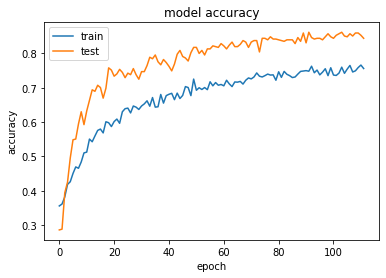

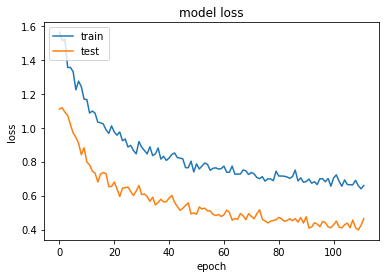

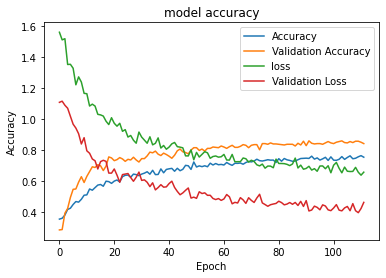

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()

In [ ]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

opt = SGD(learning_rate=1e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=opt,metrics=['accuracy'])

mc = ModelCheckpoint("Alexnet.h5", monitor="val_accuracy", mode="max", save_best_only=True)

H = model.fit(train_generator,validation_data=test_generator,epochs=150,verbose=1,callbacks=[mc])

Epoch 1/150
56/56 [==============================] - 488s 9s/step - loss: 1.5768 - accuracy: 0.3538 - val_loss: 1.1513 - val_accuracy: 0.2489
Epoch 2/150
56/56 [==============================] - 24s 434ms/step - loss: 1.4511 - accuracy: 0.3857 - val_loss: 1.2098 - val_accuracy: 0.2489
Epoch 3/150
56/56 [==============================] - 24s 429ms/step - loss: 1.3983 - accuracy: 0.4131 - val_loss: 1.2744 - val_accuracy: 0.2489
Epoch 4/150
56/56 [==============================] - 24s 430ms/step - loss: 1.2987 - accuracy: 0.4455 - val_loss: 1.3374 - val_accuracy: 0.2489
Epoch 5/150
56/56 [==============================] - 24s 430ms/step - loss: 1.2196 - accuracy: 0.4651 - val_loss: 1.3543 - val_accuracy: 0.2489
Epoch 6/150
56/56 [==============================] - 24s 435ms/step - loss: 1.2194 - accuracy: 0.4958 - val_loss: 1.2884 - val_accuracy: 0.2511
Epoch 7/150
56/56 [==============================] - 24s 435ms/step - loss: 1.1820 - accuracy: 0.4930 - val_loss: 1.2231 - val_accuracy: 0

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ["Downy mildew disease","Healthy","Rust disease"]
print(classification_report(test_generator.classes, y_pred,target_names=target_names))

Confusion Matrix
[[129   6  14]
 [  3 110   0]
 [ 27   8 157]]
Classification Report
                      precision    recall  f1-score   support

Downy mildew disease       0.81      0.87      0.84       149
             Healthy       0.89      0.97      0.93       113
        Rust disease       0.92      0.82      0.87       192

            accuracy                           0.87       454
           macro avg       0.87      0.89      0.88       454
        weighted avg       0.88      0.87      0.87       454



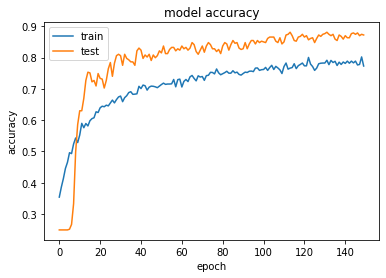

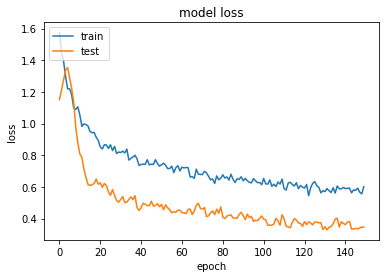

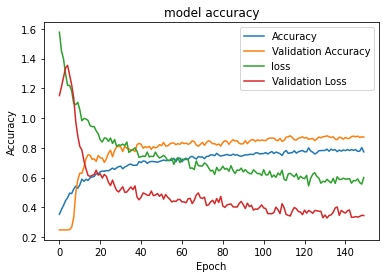

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()